In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import brewer2mpl
import json
import sys
from scipy.spatial.distance import cdist
from scipy.spatial.distance import euclidean

%matplotlib inline

In [2]:
bmap = brewer2mpl.get_map("Set2", "qualitative", 7)                                                                                                                                                                                                                                                                          
colors = bmap.colors
Lcolors = colors[0:6]

for i in range(6):
    color = [i/255. for i in Lcolors[i]]
    Lcolors[i] = color


In [3]:
def HausdorffScore(cfs1, cfs2):
    """
    compute the modified Hausdorff score for measuring the consistency between two sets of counterfactual explanations.
    Arguments:
        cfs1: the first set of counterfactual explanations.
        cfs2: the second set of counterfactual explanations.
    returns: 
        modified Hausdorff distance between two sets.
    """
    cfs1, cfs2 = np.array(cfs1), np.array(cfs2)
    pairwise_distance = cdist(cfs1, cfs2)
    h_A_B = pairwise_distance.min(1).mean()
    h_B_A = pairwise_distance.min(0).mean()

    return max(h_A_B, h_B_A)

# def stat(filename):
#     with open(filename, 'r') as f:
#         data = json.load(f)
    
#     distance = []
#     proximity = []
#     sparsity = []
#     aps = []

#     num = data['num']
#     cfs = data['cf']
#     for i in range(len(cfs)):
#         cf_list = cfs[i]
#         cf_data_list = []
#         cf2_data_list = []
#         for j in range(num[i]):
#             cf = cf_list[j]
#             cf_data_list.extend(cf['cf'])
#             cf2_data_list.extend(cf['cf2'])
#             proximity.append(cf['proximity'])
#             sparsity.append(cf['sparsity'])
#             aps.append(cf['aps'])

#         distance.append(HausdorffScore(cf_data_list, cf2_data_list))

#     return np.mean(distance), np.mean(proximity), np.mean(sparsity), np.mean(aps)

def stat(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
    
    distance = []
    proximity = []
    sparsity = []
    aps = []

    num = data['num']
    cfs = data['cf']

    diversity_lists = np.array(data['diversity'])
    diversity_lists = diversity_lists[diversity_lists != -1]

    diversity2_lists = np.array(data['diversity2'])
    diversity2_lists = diversity2_lists[diversity2_lists != -1]
    print(f'div: {len(diversity_lists)} | div2: {len(diversity2_lists)}')
    for i in range(len(cfs)):
        cf_list = cfs[i]
        cf_data_list = []
        cf2_data_list = []
        for j in range(len(cf_list)):
            cf = cf_list[j]
            cf_data_list.extend(cf['cf'])
            cf2_data_list.extend(cf['cf2'])
            proximity.append(cf['proximity'])
            sparsity.append(cf['sparsity'])
            aps.append(cf['aps'])

        if len(cf_list) > 0:
            distance.append(HausdorffScore(cf_data_list, cf2_data_list))
    if len(diversity_lists) == 0:
        diversity_lists = [0.0]
    if len(diversity2_lists) == 0:
        diversity2_lists = [0.0]
    print(diversity_lists)
    return np.mean(distance), np.mean(proximity), np.mean(sparsity), np.mean(aps), np.mean(diversity_lists), np.mean(diversity2_lists)


def stat_cfmss(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
    
    distance = []
    proximity = []
    sparsity = []
    aps = []

    num = data['num']
    cfs = data['cf']
    cf2 = data['cf2']

    diversity_lists = np.array(data['diversity'])
    diversity_lists = diversity_lists[diversity_lists != -1]

    diversity2_lists = np.array(data['diversity2'])
    diversity2_lists = diversity2_lists[diversity2_lists != -1]
    print(f'div: {len(diversity_lists)} | div2: {len(diversity2_lists)}')

    for i in range(len(cfs)):
        cf_list = cfs[i]
        cf_data_list = []
        for j in range(num[i]):
            cf = cf_list[j]
            cf_data_list.extend(cf['cf'])
            proximity.append(cf['proximity'])
            sparsity.append(cf['sparsity'])
            aps.append(cf['aps'])
        cf2_data_list = cf2[i]
        
        if len(cf_data_list) > 0 and len(cf2_data_list) > 0:
            distance.append(HausdorffScore(cf_data_list, cf2_data_list))
    if len(diversity_lists) == 0:
        diversity_lists = [0.0]
    if len(diversity2_lists) == 0:
        diversity2_lists = [0.0]
    print(diversity_lists)
    return np.mean(distance), np.mean(proximity), np.mean(sparsity), np.mean(aps), np.mean(diversity_lists), np.mean(diversity2_lists)

In [4]:
synthetic_gs = "../cfgen-update/synthetic/synthetic_growingsphere.json"
synthetic_cfproto = "../cfgen-update/synthetic/synthetic_cfproto1.json"
synthetic_plaincf = "../cfgen-update/synthetic/synthetic_plaincf.json"
synthetic_dice = "../cfgen-update/synthetic/synthetic_dice.json"
synthetic_sns = "../consistency/code/synthetic_sns_update.json"
synthetic_cfmss = "../cfgen-update/synthetic/synthetic_cfmss.json"

syn_distance_gs, syn_proximity_gs, syn_sparsity_gs, syn_aps_gs, syn_div_gs, syn_div2_gs = stat(synthetic_gs)
syn_distance_cfproto, syn_proximity_cfproto, syn_sparsity_cfproto, syn_aps_cfproto, syn_div_cfproto, syn_div2_cfproto = stat(synthetic_cfproto)
syn_distance_plaincf, syn_proximity_plaincf, syn_sparsity_plaincf, syn_aps_plaincf, syn_div_plaincf, syn_div2_plaincf = stat(synthetic_plaincf)
syn_distance_dice, syn_proximity_dice, syn_sparsity_dice, syn_aps_dice, syn_div_dice, syn_div2_dice = stat(synthetic_dice)
syn_distance_sns, syn_proximity_sns, syn_sparsity_sns, syn_aps_sns, syn_div_sns, syn_div2_sns = stat(synthetic_sns)
syn_distance_cfmss, syn_proximity_cfmss, syn_sparsity_cfmss, syn_aps_cfmss, syn_div_cfmss, syn_div2_cfmss = stat_cfmss(synthetic_cfmss)

div: 495 | div2: 495
[1.85739721e-02 4.13669748e-02 4.08640682e-03 1.13707163e-01
 1.49710101e-02 5.62394052e-02 2.43874554e-02 2.75883323e-01
 2.73526192e-03 1.93213755e-03 2.05447663e-01 1.80453619e-01
 1.97671178e-03 7.03832835e-03 4.66104254e-02 8.51856743e-03
 4.28344853e-04 3.79563683e-02 8.37576847e-02 2.24453020e-02
 2.47666755e-03 1.39589455e-01 4.01839433e-01 2.84822839e-02
 3.08842179e-03 5.02289795e-02 1.05713762e-02 1.59465881e-02
 1.23868036e-02 8.64703460e-02 9.36929676e-03 1.61396810e-02
 1.88530993e-01 1.05578093e-02 1.47587823e-02 5.11250470e-03
 8.28784038e-02 5.70778380e-01 6.87333090e-02 2.47047675e-04
 4.49198065e-03 1.96259638e-02 5.20393556e-03 1.26015939e-01
 5.25781821e-03 3.45231060e-01 9.54211498e-02 4.38083683e-04
 3.39707986e-01 2.20863205e-03 7.95226045e-02 1.36369242e-03
 7.47761247e-02 3.55509783e-03 1.35840843e-02 1.35186429e-02
 7.06924289e-01 1.46956545e-03 2.34467586e-03 1.14814576e-02
 6.39534614e-03 2.22801905e-02 1.39654750e-02 4.74440281e-01
 8.

In [5]:
thyroid_gs = "../cfgen-update/thyroid/thyroid_growingsphere.json"
thyroid_cfproto = "../cfgen-update/thyroid/Thyroid_cfproto.json"
thyroid_plaincf = "../cfgen-update/thyroid/thyroid_plaincf.json"
thyroid_dice = "../cfgen-update/thyroid/thyroid_dice.json"
thyroid_sns = "../consistency/code/thyroid_sns_update.json"
thyroid_cfmss = "../cfgen-update/thyroid/thyroid_cfmss.json"

thyroid_distance_gs, thyroid_proximity_gs, thyroid_sparsity_gs, thyroid_aps_gs, thyroid_div_gs, thyroid_div2_gs = stat(thyroid_gs)
thyroid_distance_cfproto, thyroid_proximity_cfproto, thyroid_sparsity_cfproto, thyroid_aps_cfproto, thyroid_div_cfproto, thyroid_div2_cfproto = stat(thyroid_cfproto)
thyroid_distance_plaincf, thyroid_proximity_plaincf, thyroid_sparsity_plaincf, thyroid_aps_plaincf, thyroid_div_plaincf, thyroid_div2_plaincf = stat(thyroid_plaincf)
thyroid_distance_dice, thyroid_proximity_dice, thyroid_sparsity_dice, thyroid_aps_dice, thyroid_div_dice, thyroid_div2_dice = stat(thyroid_dice)
thyroid_distance_sns, thyroid_proximity_sns, thyroid_sparsity_sns, thyroid_aps_sns, thyroid_div_sns, throid_div2_sns = stat(thyroid_sns)
thyroid_distance_cfmss, thyroid_proximity_cfmss, thyroid_sparsity_cfmss, thyroid_aps_cfmss, thyroid_div_cfmss, thyroid_div2_cfmss = stat_cfmss(thyroid_cfmss)

div: 0 | div2: 0
[0.0]
div: 0 | div2: 0
[0.0]
div: 0 | div2: 0
[0.0]
div: 0 | div2: 0
[0.0]
div: 0 | div2: 0
[0.0]
div: 0 | div2: 0
[0.0]


In [6]:
hepatitis_gs = "../cfgen-update/hepatitis/Hepatitis_growingsphere.json"
hepatitis_cfproto = "../cfgen-update/hepatitis/Hepatitis_cfproto.json"
hepatitis_plaincf = "../cfgen-update/hepatitis/Hepatitis_plaincf.json"
hepatitis_dice = "../cfgen-update/hepatitis/Hepatitis_dice.json"
hepatitis_sns = "../consistency/code/hepatitis_sns_update.json"
hepatitis_cfmss = "../cfgen-update/hepatitis/Hepatitis_cfmss.json"


hepatitis_distance_gs, hepatitis_proximity_gs, hepatitis_sparsity_gs, hepatitis_aps_gs, hepatitis_div_gs, hepatitis_div2_gs = stat(hepatitis_gs)
hepatitis_distance_cfproto, hepatitis_proximity_cfproto, hepatitis_sparsity_cfproto, hepatitis_aps_cfproto, hepatitis_div_cfproto, hepatitis_div2_cfproto = stat(hepatitis_cfproto)
hepatitis_distance_plaincf, hepatitis_proximity_plaincf, hepatitis_sparsity_plaincf, hepatitis_aps_plaincf, hepatitis_div_plaincf, hepatitis_div2_plaincf = stat(hepatitis_plaincf)
hepatitis_distance_dice, hepatitis_proximity_dice, hepatitis_sparsity_dice, hepatitis_aps_dice, hepatitis_div_dice, hepatitis_div2_dice = stat(hepatitis_dice)
hepatitis_distance_sns, hepatitis_proximity_sns, hepatitis_sparsity_sns, hepatitis_aps_sns, hepatitis_div_sns, hepatitis_div2_sns = stat(hepatitis_sns)
hepatitis_distance_cfmss, hepatitis_proximity_cfmss, hepatitis_sparsity_cfmss, hepatitis_aps_cfmss, hepatitis_div_cfmss, hepatitis_div2_cfmss = stat_cfmss(hepatitis_cfmss)

div: 13 | div2: 13
[0.11767006 0.05865921 0.15173221 0.339166   0.23473401 0.48520419
 0.02936756 0.65762937 0.00348019 0.09863606 0.18188269 0.46202309
 0.3508737 ]
div: 14 | div2: 14
[0.01745374 0.17999268 0.03969074 0.26543928 0.16037098 0.14538878
 0.09768848 0.03308617 0.21228222 0.12608701 0.14253112 0.22540495
 0.15654682 0.16092351]
div: 14 | div2: 14
[0.18506099 0.17069259 0.22811426 0.34299567 0.34748409 0.15973286
 0.18291719 0.19391879 0.36401727 0.50555541 0.35274096 0.34189141
 0.31996466 0.34919396]
div: 14 | div2: 14
[0.24483124 0.22456486 0.3665431  0.40691132 0.35769847 0.152048
 0.15389049 0.27781553 0.30728165 0.38881388 0.36104737 0.11713668
 0.33741181 0.15735759]
div: 13 | div2: 13
[0.08431685 0.00192103 0.04578612 0.01104447 0.01438494 0.00714041
 0.0186496  0.06062073 0.00306327 0.06105774 0.0123143  0.01171549
 0.02760479]
div: 14 | div2: 8
[0.03479232 0.09916203 0.06487864 0.12940989 0.13739286 0.0325957
 0.11888776 0.04969517 0.11607364 0.18381163 0.08276135

In [7]:
xaxis_label = ["GS", "PlainCF", "DiCE","CFProto", "SNS", "CEMSP"]
xtick = np.arange(6)

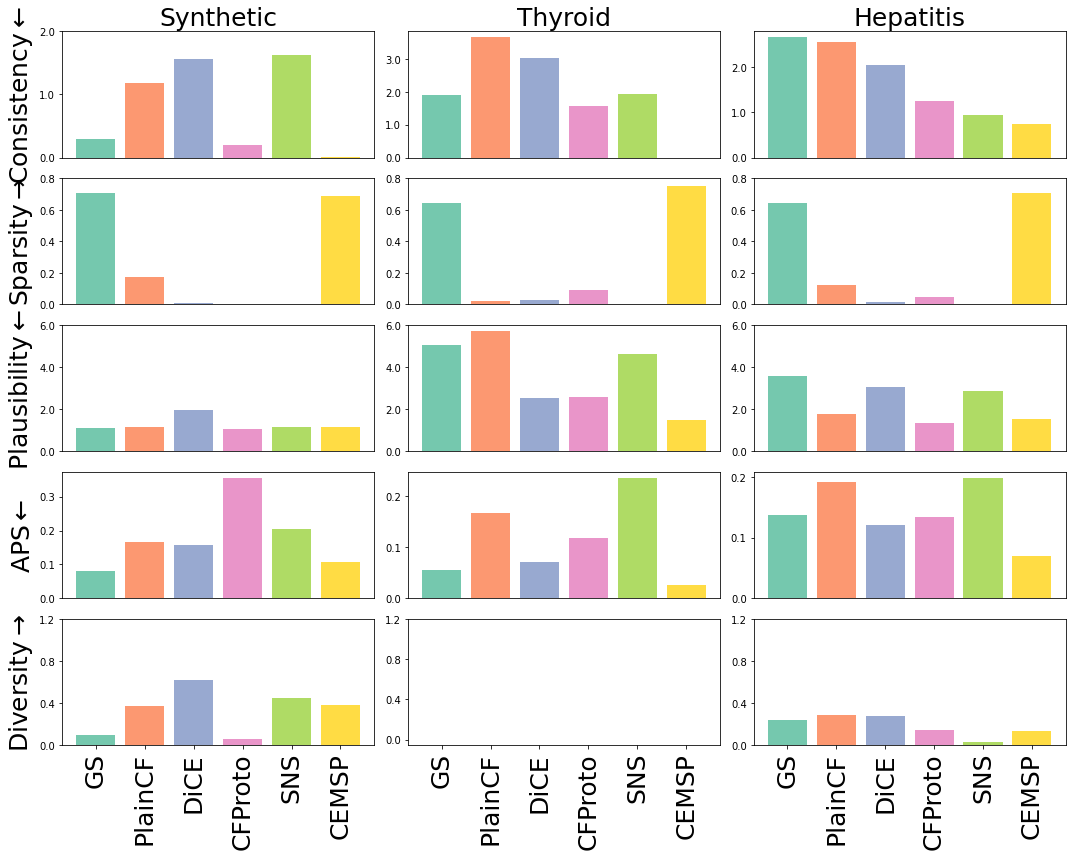

In [8]:
from matplotlib.ticker import FormatStrFormatter
fig, axs = plt.subplots(5, 3, figsize=(15, 12))
plt.rcParams['xtick.labelsize']= 20
plt.rcParams['ytick.labelsize']= 20
# plt.rcParams["figure.figsize"] = (15, 20)

alpha = 0.9
fontsize = 25

axs[0, 0].bar(xtick,  [syn_distance_gs, syn_distance_plaincf, syn_distance_dice,  syn_distance_cfproto, syn_distance_sns, syn_distance_cfmss], color=Lcolors, alpha = alpha)
axs[0, 1].bar(xtick,  [thyroid_distance_gs, thyroid_distance_plaincf, thyroid_distance_dice,  thyroid_distance_cfproto, thyroid_distance_sns, thyroid_distance_cfmss], color=Lcolors, alpha = alpha)
axs[0, 2].bar(xtick,  [hepatitis_distance_gs, hepatitis_distance_plaincf, hepatitis_distance_dice,  hepatitis_distance_cfproto, hepatitis_distance_sns, hepatitis_distance_cfmss], color=Lcolors, alpha = alpha)


axs[1, 0].bar(xtick,  [syn_sparsity_gs, syn_sparsity_plaincf, syn_sparsity_dice,  syn_sparsity_cfproto, syn_sparsity_sns, syn_sparsity_cfmss], color=Lcolors, alpha = alpha)
axs[1, 1].bar(xtick,  [thyroid_sparsity_gs, thyroid_sparsity_plaincf, thyroid_sparsity_dice,  thyroid_sparsity_cfproto, thyroid_sparsity_sns, thyroid_sparsity_cfmss], color=Lcolors, alpha = alpha)
axs[1, 2].bar(xtick,  [hepatitis_sparsity_gs, hepatitis_sparsity_plaincf, hepatitis_sparsity_dice,  hepatitis_sparsity_cfproto, hepatitis_sparsity_sns, hepatitis_sparsity_cfmss], color=Lcolors, alpha = alpha)

axs[2, 0].bar(xtick,  [syn_proximity_gs, syn_proximity_plaincf, syn_proximity_dice,  syn_proximity_cfproto, syn_proximity_sns, syn_proximity_cfmss], color=Lcolors, alpha = alpha)
axs[2, 1].bar(xtick,  [thyroid_proximity_gs, thyroid_proximity_plaincf, thyroid_proximity_dice,  thyroid_proximity_cfproto, thyroid_proximity_sns, thyroid_proximity_cfmss], color=Lcolors, alpha = alpha)
axs[2, 2].bar(xtick,  [hepatitis_proximity_gs, hepatitis_proximity_plaincf, hepatitis_proximity_dice,  hepatitis_proximity_cfproto, hepatitis_proximity_sns, hepatitis_proximity_cfmss], color=Lcolors, alpha = alpha)

axs[3, 0].bar(xtick,  [syn_aps_gs, syn_aps_plaincf, syn_aps_dice,  syn_aps_cfproto, syn_aps_sns, syn_aps_cfmss], color=Lcolors, alpha = alpha)
axs[3, 1].bar(xtick,  [thyroid_aps_gs, thyroid_aps_plaincf, thyroid_aps_dice,  thyroid_aps_cfproto, thyroid_aps_sns, thyroid_aps_cfmss], color=Lcolors, alpha = alpha)
axs[3, 2].bar(xtick,  [hepatitis_aps_gs, hepatitis_aps_plaincf, hepatitis_aps_dice,  hepatitis_aps_cfproto, hepatitis_aps_sns, hepatitis_aps_cfmss], color=Lcolors, alpha = alpha)

axs[4, 0].bar(xtick,  [syn_div_gs, syn_div_plaincf, syn_div_dice,  syn_div_cfproto, syn_div_sns, syn_div_cfmss], color=Lcolors, alpha = alpha)
axs[4, 1].bar(xtick,  [thyroid_div_gs, thyroid_div_plaincf, thyroid_div_dice,  thyroid_div_cfproto, thyroid_div_sns, thyroid_div_cfmss], color=Lcolors, alpha = alpha)
axs[4, 2].bar(xtick,  [hepatitis_div_gs, hepatitis_div_plaincf, hepatitis_div_dice,  hepatitis_div_cfproto, hepatitis_div_sns, hepatitis_div_cfmss], color=Lcolors, alpha = alpha)

# axs[5, 0].bar(xtick,  [syn_div2_gs, syn_div2_plaincf, syn_div2_dice,  syn_div2_cfproto, syn_div2_sns, syn_div2_cfmss], color=Lcolors, alpha = alpha)
# axs[5, 1].bar(xtick,  [thyroid_div2_gs, thyroid_div2_plaincf, thyroid_div2_dice,  thyroid_div2_cfproto, thyroid_div_sns, thyroid_div_cfmss], color=Lcolors, alpha = alpha)
# axs[5, 2].bar(xtick,  [hepatitis_div2_gs, hepatitis_div2_plaincf, hepatitis_div2_dice,  hepatitis_div2_cfproto, hepatitis_div2_sns, hepatitis_div2_cfmss], color=Lcolors, alpha = alpha)





# Set Ylabel
axs[0,0].set_ylabel(r"Consistency$\leftarrow$", fontsize = fontsize)
axs[1,0].set_ylabel(r"Sparsity$\rightarrow$", fontsize = fontsize)
axs[2,0].set_ylabel(r"Plausibility$\leftarrow$", fontsize = fontsize)
axs[3,0].set_ylabel(r"APS$\leftarrow$", fontsize = fontsize)
axs[4,0].set_ylabel(r"Diversity$\rightarrow$", fontsize = fontsize)
# axs[5,0].set_ylabel(r"Div2$\rightarrow$", fontsize = fontsize)

# Set Title
axs[0,0].set_title(r'Synthetic', fontsize = fontsize)
axs[0,1].set_title(r'Thyroid', fontsize = fontsize)
axs[0,2].set_title(r'Hepatitis', fontsize = fontsize)

# Set X tick
axs[0, 0].set_xticks([])
axs[0, 1].set_xticks([])
axs[0, 2].set_xticks([])
axs[1, 0].set_xticks([])
axs[1, 1].set_xticks([])
axs[1, 2].set_xticks([])
axs[2, 0].set_xticks([])
axs[2, 1].set_xticks([])
axs[2, 2].set_xticks([])
axs[3, 0].set_xticks([])
axs[3, 1].set_xticks([])
axs[3, 2].set_xticks([])
# axs[4, 0].set_xticks([])
# axs[4, 1].set_xticks([])
# axs[4, 2].set_xticks([])

axs[4,0].set_xticks(xtick)
axs[4,0].set_xticklabels(xaxis_label, fontsize = fontsize, rotation = 90)
axs[4,1].set_xticks(xtick)
axs[4,1].set_xticklabels(xaxis_label, fontsize = fontsize, rotation = 90)
axs[4,2].set_xticks(xtick)
axs[4,2].set_xticklabels(xaxis_label, fontsize = fontsize, rotation = 90)

# Set Y limit
axs[0,0].set_yticks(np.arange(0, 2.3, 1))
axs[0,1].set_yticks(np.arange(0, 3.3, 1))
axs[0,2].set_yticks(np.arange(0, 2.3, 1))

axs[1,0].set_yticks(np.arange(0, 0.82, 0.2))
axs[1,1].set_yticks(np.arange(0, 0.82, 0.2))
axs[1,2].set_yticks(np.arange(0, 0.82, 0.2))


axs[2,0].set_yticks(np.arange(0, 6.2, 2))
axs[2,1].set_yticks(np.arange(0, 6.2, 2))
axs[2,2].set_yticks(np.arange(0, 6.2, 2))


axs[3,0].set_yticks(np.arange(0, 0.37, 0.1))
axs[3,1].set_yticks(np.arange(0, 0.27, 0.1))
axs[3,2].set_yticks(np.arange(0, 0.27, 0.1))

#需要调整
axs[4,0].set_yticks(np.arange(0, 1.3, 0.4))
axs[4,1].set_yticks(np.arange(0, 1.3, 0.4))
axs[4,2].set_yticks(np.arange(0, 1.3, 0.4))

# axs[5,0].set_yticks(np.arange(0, 1.3, 0.2))
# axs[5,1].set_yticks(np.arange(0, 1.3, 0.2))
# axs[5,2].set_yticks(np.arange(0, 1.3, 0.2))

axs[0,0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[0,1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[0,2].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[1,0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[1,1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[1,2].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[2,0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[2,1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[2,2].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[3,0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[3,1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[3,2].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[4,0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[4,1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[4,2].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
# axs[5,0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
# axs[5,1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
# axs[5,2].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))


plt.tight_layout()
plt.savefig("experiments43-model-update-bar.pdf", dpi = 1200, bbox_inches = 'tight')
plt.show()

In [9]:
[syn_div_gs, syn_div_plaincf, syn_div_dice,  syn_div_cfproto, syn_div_sns, syn_div_cfmss]

[0.09472806178878386,
 0.37633806583485774,
 0.6191142169294083,
 0.05943744272514288,
 0.45163304577015856,
 0.38173906783961614]

In [80]:
thyroid_proximity_plaincf

5.707567613773396